# Trabalho MPL

#### Alunos: Alexsandro Guilherme Thomas, Igor Andrey Ronsoni
#### Palavras Chave: MPL, Predição, Backpropagation
#### Repositório Github: [https://github.com/northy/Inteligencia-Artificial](https://github.com/northy/Inteligencia-Artificial)

## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.

### Definições

### Bibliotecas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore') # warning de função desatualizada

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [2]:
plot_graphs, display_info = True, True # Poupa tempo se estiver desligado

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [3]:
DataSet=pd.read_csv('arruela_.csv')

In [4]:
if display_info :
    print(DataSet.head())

       Hora  Tamanho  Referencia  NumAmostra  Area  Delta  Output1  Output2
0  13:00:06       53          25          69    81     68        1        0
1  13:00:07       53          26          89    87     56        1        0
2  13:00:08       53          27          68    69     55        1        0
3  13:00:09       53          28          36    50     80        1        0
4  13:00:10       53          29          71    72     50        1        0


In [5]:
DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [6]:
if display_info :
    print(DataSet.head())

   NumAmostra  Area  Delta  Output1  Output2
0          69    81     68        1        0
1          89    87     56        1        0
2          68    69     55        1        0
3          36    50     80        1        0
4          71    72     50        1        0


In [7]:
if display_info :
    print(DataSet.describe())

       NumAmostra        Area       Delta     Output1     Output2
count  261.000000  261.000000  261.000000  261.000000  261.000000
mean    59.777778   63.697318   54.747126    0.375479    0.624521
std     17.293075   30.629366   35.548413    0.485177    0.485177
min      3.000000    6.000000   17.000000    0.000000    0.000000
25%     50.000000   46.000000   38.000000    0.000000    0.000000
50%     59.000000   56.000000   44.000000    0.000000    1.000000
75%     69.000000   68.000000   54.000000    1.000000    1.000000
max    120.000000  201.000000  251.000000    1.000000    1.000000


### Váriaveis do *Dataset*

In [8]:
if display_info :
    print(DataSet.columns)

Index(['NumAmostra', 'Area', 'Delta', 'Output1', 'Output2'], dtype='object')


### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

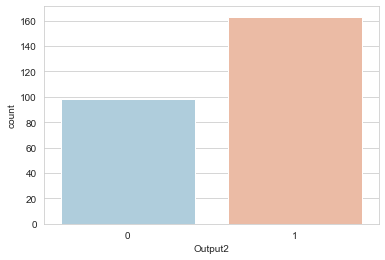

In [9]:
if plot_graphs :
    sns.set_style('whitegrid')
    sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
    plt.show()

#### Gráfico da distribuição das áreas das peças

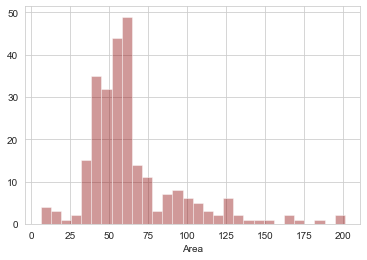

In [10]:
if plot_graphs :
    sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
    plt.show()

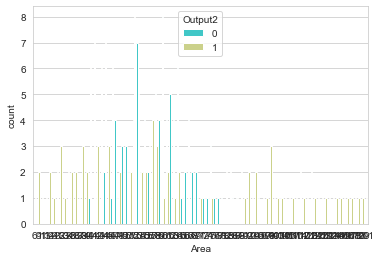

In [11]:
if plot_graphs :
    sns.set_style('whitegrid')
    sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
    plt.show()

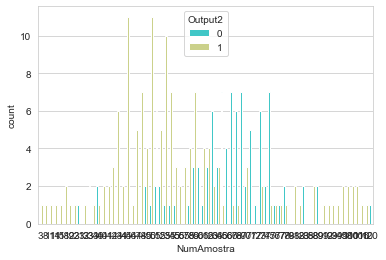

In [12]:
if plot_graphs :
    sns.set_style('whitegrid')
    sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
    plt.show()

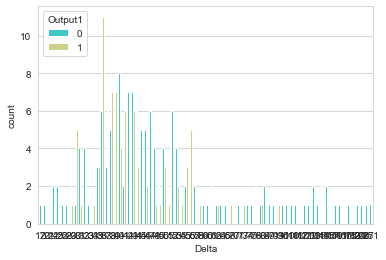

In [13]:
if plot_graphs :
    sns.set_style('whitegrid')
    sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
    plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [14]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

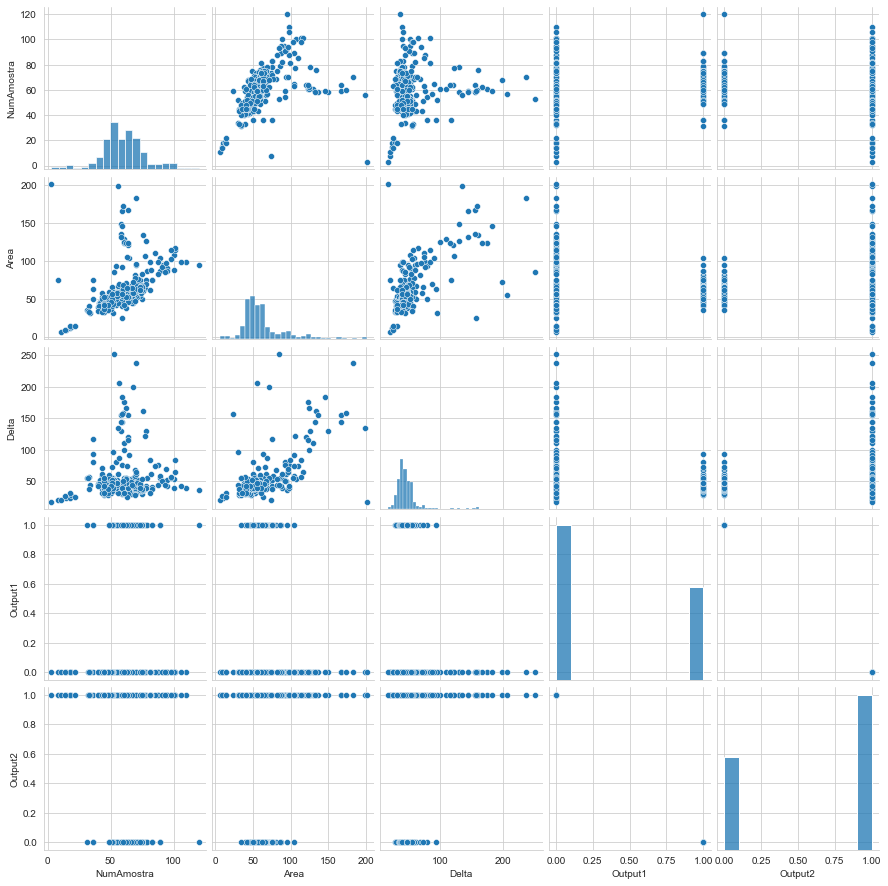

In [15]:
if plot_graphs :
    sns.pairplot(DataSet)
    plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

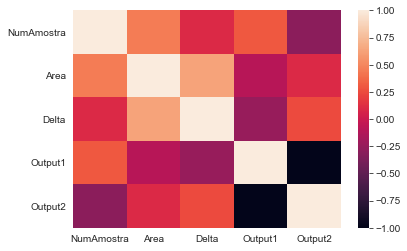

In [16]:
if plot_graphs :
    sns.heatmap(DataSet.corr())
    plt.show()

## Normalização dos Dados

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['NumAmostra', 'Area', 'Delta', 'Output1','Output2'])

In [18]:
if display_info :
    print(DataSetScaled.head())

   NumAmostra      Area     Delta   Output1   Output2
0    0.534314  0.565990  0.373528  1.289676 -1.289676
1    1.693069  0.762257  0.035312  1.289676 -1.289676
2    0.476377  0.173457  0.007127  1.289676 -1.289676
3   -1.377630 -0.448055  0.711745  1.289676 -1.289676
4    0.650190  0.271590 -0.133796  1.289676 -1.289676


### Conjunto de dados para o treinamento

In [19]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=420)

if display_info :
    print(y_test)
    print(X_test)

     Output1  Output2
116        0        1
225        0        1
44         1        0
213        0        1
7          1        0
..       ...      ...
247        0        1
71         1        0
110        0        1
46         1        0
183        0        1

[79 rows x 2 columns]
     NumAmostra      Area     Delta
116   -0.566502 -0.546188 -0.443828
225   -0.276814 -0.349921 -0.302904
44     0.650190 -0.120943 -0.472013
213   -0.334751 -0.448055 -0.415643
7      0.476377 -0.644322 -0.697490
..          ...       ...       ...
247   -0.508564 -0.251788 -0.218350
71     0.418439 -0.088232 -0.302904
110   -0.392689 -0.382633 -0.331089
46     0.766065 -0.088232 -0.528382
183    0.302564  1.318346  1.021776

[79 rows x 3 columns]


## Criando o Modelo de MPL

In [21]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3 # Vale a pena cortar alguma entrada?
N_hidden = 12 # Vale a pena abaixar ou aumentar?
N_output = 2
learnrate = 0.5 # Vale a pena abaixar ou aumentar?

## Inicialização dos pesos da MPL (Aleatório)

In [22]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
if display_info :
    print('Pesos da Camada Oculta:')
    print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
if display_info :
    print('Pesos da Camada de Saída:')
    print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.02132144 -0.21472293 -0.04250981  0.0213427  -0.01896949 -0.09935884
   0.17846417 -0.11355021  0.06777424  0.16275928  0.14627934  0.35169171]
 [ 0.03628018 -0.0109857   0.28244136  0.0224279   0.1155912  -0.07363247
  -0.06549432 -0.01563995 -0.03786737  0.02306778  0.08874278 -0.01646847]
 [-0.02945978  0.05965281 -0.07727339 -0.0205691   0.09711371  0.02926202
  -0.02714621 -0.06656759  0.03294113  0.00814129 -0.11117908  0.31370579]]
Pesos da Camada de Saída:
[[-0.02627371 -0.14609246]
 [-0.10114006 -0.0899921 ]
 [-0.07096654 -0.10749524]
 [ 0.05232048 -0.05622838]
 [-0.02516691  0.05960179]
 [ 0.09055859 -0.04323667]
 [-0.10564798  0.13723796]
 [ 0.11574965  0.06772727]
 [-0.06373678  0.05823009]
 [-0.02788296  0.15565894]
 [-0.0113782   0.01347736]
 [-0.0333996  -0.03652378]]


### Algoritmo de verificacao

In [23]:
def testa(xv, yv, n) :
    MSE = 0
    for xi, yi in zip(xv, yv):
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        MSE += np.mean((yi - out) ** 2) #mean quadractic difference
    return MSE/n_records

## Algoritmo Backpropagation

In [24]:
maxepochs = 100000
qet = 0.1 #quadratic error target
n_prints = 1000 #log and check every x epochs
ace = 0 #aumento consecutivo no error
last_loss=None
EvolucaoError=[]
IndiceError=[]

print(f"Executando máximo de {maxepochs} épocas com coleção de dados a cada {n_prints} passos, até o MSE ser menor que {qet}")

e = 0
while e<=maxepochs :
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % n_prints == 0:
        loss = testa(X_train.values, y_train.values, n_records)

        print("(época {:6d})".format(e), end=' ')
        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento:", loss, " Atenção: O erro está aumentando")
            ace+=1
        else:
            print("Erro quadrático no treinamento:", loss)
            ace = 0
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)
        
        if ace>=4 or loss<qet :
            break
    
    e+=1

Executando máximo de 100000 épocas com coleção de dados a cada 1000 passos, até o MSE ser menor que 0.1
(época      0) Erro quadrático no treinamento: 0.2465123234497522
(época   1000) Erro quadrático no treinamento: 0.16517945226589995
(época   2000) Erro quadrático no treinamento: 0.1355445597438692
(época   3000) Erro quadrático no treinamento: 0.12724332194448465
(época   4000) Erro quadrático no treinamento: 0.12381096970737071
(época   5000) Erro quadrático no treinamento: 0.12189539333083113
(época   6000) Erro quadrático no treinamento: 0.12064894040791795
(época   7000) Erro quadrático no treinamento: 0.11972008304934088
(época   8000) Erro quadrático no treinamento: 0.11895330389999269
(época   9000) Erro quadrático no treinamento: 0.11828361763036686
(época  10000) Erro quadrático no treinamento: 0.11768141583057165
(época  11000) Erro quadrático no treinamento: 0.1171320179168134
(época  12000) Erro quadrático no treinamento: 0.11662520845169867
(época  13000) Erro quadráti

In [25]:
### Gráfico da Evolução do Erro

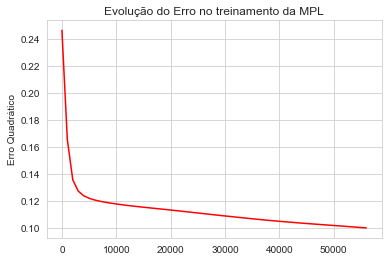

In [26]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [27]:
print("Pesos finais:")

print('Camada Oculta:')
print(weights_input_hidden)

print('Camada de Saída:')
print(weights_hidden_output)

Pesos finais:
Camada Oculta:
[[ -1.96012838 -12.47899385   1.32196845  -1.97010595 -11.24465345
   -0.61494072   1.53290097  -0.58627395   1.97411791   1.88913388
   -0.17910227  -2.25851726]
 [  1.80568595  -7.12913596   1.23744235   1.83551868   9.37294642
    1.75602002   0.28412403   1.68043151  -0.19927311  -0.03398011
   -2.31656361  -0.32519157]
 [ -2.13897356   2.06279201  -0.13394548  -2.16483904  -3.08152305
    0.69374367   0.35896789   0.51276735   0.76564226   0.55540357
   -3.94777706  -0.16793539]]
Camada de Saída:
[[ 3.71410367 -3.79014855]
 [-6.46289174  6.46416129]
 [-1.40553758  1.2521393 ]
 [ 3.75806947 -3.67387591]
 [-8.63122582  8.65405825]
 [ 2.22207479 -2.2612171 ]
 [-0.99736203  1.02616653]
 [ 1.76735475 -1.65167743]
 [-1.88682056  1.84045542]
 [-1.4638546   1.57786172]
 [ 3.26250817 -3.23695141]
 [ 2.35763443 -2.4244858 ]]


In [28]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0
tp1 = tn1 = fp1 = fn1 = 0
tp2 = tn2 = fp2 = fn2 = 0

ymean = np.mean(y_test.values)
MSE = np.array([0.,0.])
TSS = np.array([0.,0.])

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        
#-------------------------------------------

        MSE += (yi - output)**2
        TSS += (yi - ymean)**2

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                tp1+=1
            else :
                fp1+=1
        else :
            if (yi[0]>yi[1]):
                fn1+=1
            else :
                tn1+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>=yi[0]):
                predictions+=1
                tp2+=1
            else :
                fp2+=1
        else :
            if (yi[1]>yi[0]):
                fn2+=1
            else :
                tn2+=1

SSE = np.mean(MSE)
TSS = np.mean(TSS)

r2  = 1 - (SSE/TSS)

print(f"O modelo atingiu {predictions} acertos em {n_records} entradas de validação.")
print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))
print(f"O score R2 da predição do dataset de teste foi {r2}")

O modelo atingiu 72 acertos em 79 entradas de validação.
A Acurácia da Predição é de: 0.911
O score R2 da predição do dataset de teste foi 0.6243888011202354


In [29]:
display(Markdown("""
* Matriz de confusão para saída 1 (somente uma arruela)

|  Predição    |     \    | Valor esperado |
|:-------------|:--------:|:--------------:|
|              | Positivo |    Negativo    |
|   Positivo   |    {}    |       {}       |
|   Negativo   |    {}    |       {}       |

* Matriz de confusão para saída 2 (duas arruelas)

|  Predição    |     \    | Valor esperado |
|:-------------|:--------:|:--------------:|
|              | Positivo |    Negativo    |
|   Positivo   |    {}    |       {}       |
|   Negativo   |    {}    |       {}       |
""".format(tp1,fp1,fn1,tn1,tp2,fp2,fn2,tn2)))


* Matriz de confusão para saída 1 (somente uma arruela)

|  Predição    |     \    | Valor esperado |
|:-------------|:--------:|:--------------:|
|              | Positivo |    Negativo    |
|   Positivo   |    23    |       3       |
|   Negativo   |    4    |       49       |

* Matriz de confusão para saída 2 (duas arruelas)

|  Predição    |     \    | Valor esperado |
|:-------------|:--------:|:--------------:|
|              | Positivo |    Negativo    |
|   Positivo   |    49    |       4       |
|   Negativo   |    3    |       23       |


### Apreciação dos resultados

O trabalho efetuado consiste na elaboração de uma rede neural Multi Perceptron Layer (MPL), para a diferenciação da leitura de arruelas por um cabeçote scanner como exposto em aula, expressando se duas arruelas foram lidas ao mesmo tempo (Output 2) ou se só uma foi lida (Output 1), em relação aos dados de entrada: NumAmostra, Area e Delta.

A taxa de aprendizado $\eta$ foi definida como 0,5, para os passos não serem tão grandes que causem um "jitter" muito expressivo na taxa de erro, e não serem tão pequenos que aumentem o tempo total do treinamento de forma acentuada.

Após testes e mudanças de variáveis, notou-se que quando se definia um número muito alto de neurônios na camada oculta, a taxa de acerto da predição diminuía, mas quando definia-se um número muito pequeno a taxa também diminuía, portanto, conclui-se que a quantidade não pode ser muito grande mas também não pode ser muito pequena.

Consultando fontes da literatura [1] e fontes empíricas, uma fórmula para definir a quantidade de elementos na camada oculta é disposta a seguir:

$$N_h = \frac{N_s}{\alpha * (N_i+N_o)}$$

onde:

- $N_h$ é o número de neurônios na camada oculta
- $N_s$ é o número de entradas de treinamento
- $N_i$ é o número de neurônios na camada de entrada
- $N_o$ é o número de neurônios na camada de saída
- $\alpha$ é um número arbitrário entre 2 e 10 (escolhemos 3)

A saída da equação para nossas entradas foi $N_h \approx 12$.

Na tentativa de remover uma das entradas (área, devido à alta correlação com as demais variáveis de entrada, como exposto no gráfico de mapa de calor) notou-se que a taxa caía para em média 83%, então optou-se por deixar todas as três variáveis. Também, devido ao tamanho pequeno do conjunto de treinamento, e pelo fato de não usarmos aceleração de GP-GPU para os cálculos matriciais, optamos por usar somente uma camada oculta.

A evolução da taxa de erro se deu em módulo de forma acentuada no começo de modo a reduzir no final, tendo um comportamento praticamente assintótico na medida que as épocas eram executadas. Tendo em mente todos os parâmetros que foram descritos acima, e considerando a execução de épocas de treinamento até conseguir um erro quadrático médio (MSE) de menos de 0,01, a acurácia média obtida nas execuções de testes internos foi de 91,1%, que é satisfatório considerando o requerimento de uma taxa maior que 86%. O MSE foi preferido sobre o MAE pela natureza do modelo ser de predição.

Calculando um modelo de avaliação $R^2$ para o dataset de teste, utilizando a fórmula:

$$\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$$
$$MSE = \frac{1}{n} \sum_{i=1}^n (y_i-\hat{y}_i)^2$$
$$R^2 = \frac{n \wedge MSE}{\sum_{i=1}^n (y_i-\bar{y})^2}$$

obteve-se um valor de 0.6243, que é satisfatório pois é maior que 0,5.

### Referências

[1] https://hagan.okstate.edu/NNDesign.pdf#page=469